<a href="https://colab.research.google.com/github/MuhammadUsman-Khan/Elevvo-Data-Analytics-Internship-Projects/blob/main/Task%202%20-%20EDA%20on%20Titanic%20Dataset/Task_2_Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic Dataset - Exploratory Data Analysis (EDA)

Loading Data

In [ ]:
# importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(style="darkgrid")
warnings.simplefilter("ignore")

In [ ]:
# loading the dataset
df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Handling Missing Values

In [ ]:
# Basic info of the dataset (shape, null values)
print("Shape of the Datase:: ", df.shape)
df.info()

df.isnull().sum()

Shape of the Datase::  (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
# dropping and replacing the null values
df.dropna(subset=['embarked','embark_town'], inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


Visualizations

Survival Count

[]

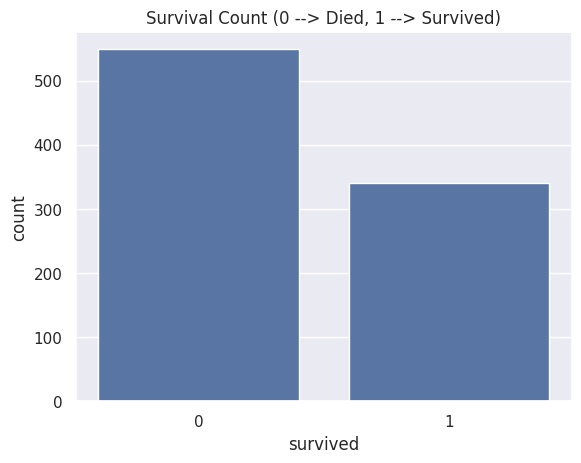

In [ ]:
# visualization
sns.countplot(x='survived', data=df)
plt.title('Survival Count (0 --> Died, 1 --> Survived)')
plt.plot()

Survival by Gender

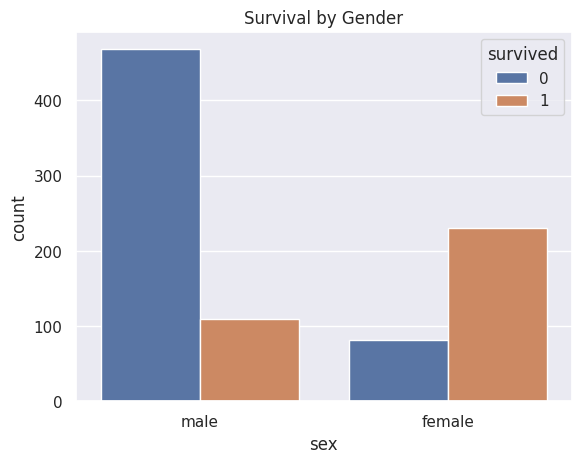

In [ ]:
# visualization
sns.countplot(x='sex',hue='survived' , data=df)
plt.title('Survival by Gender')
plt.show()

Survival by Passenger Class

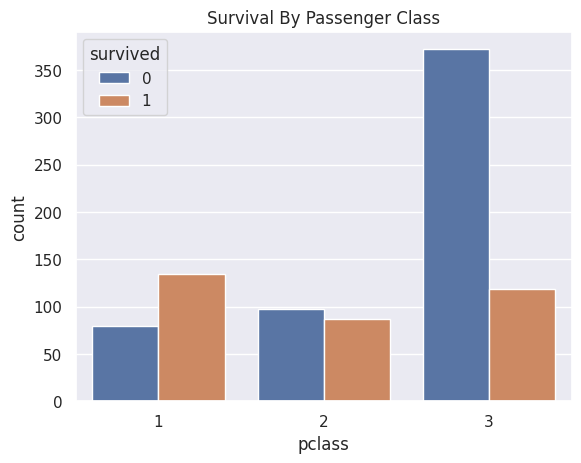

In [ ]:
# visualization
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival By Passenger Class')
plt.show()

Age Distribution by Passengers

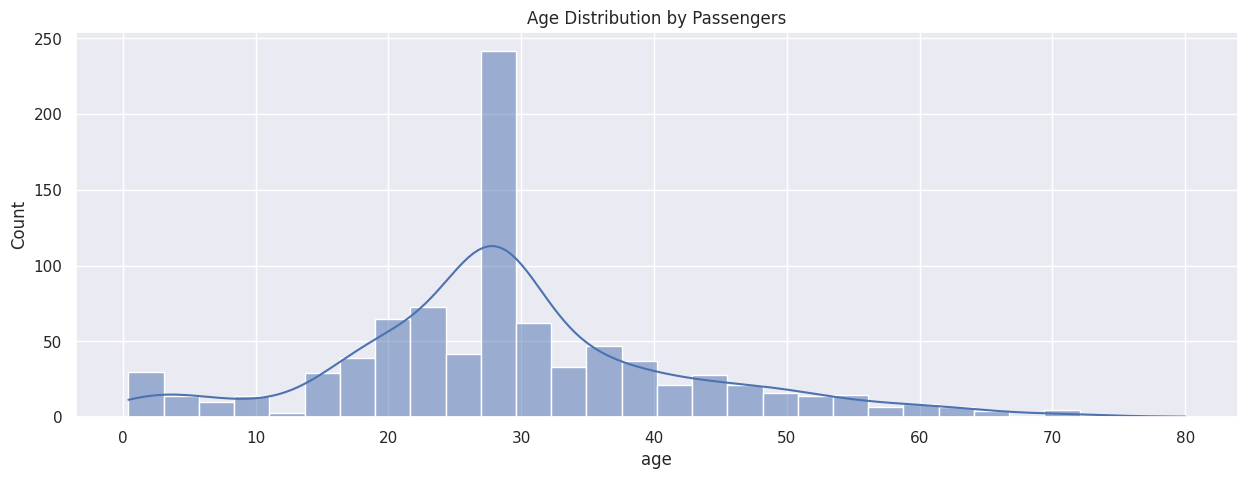

In [ ]:
# visualization
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution by Passengers')
plt.show()

Survival by Age

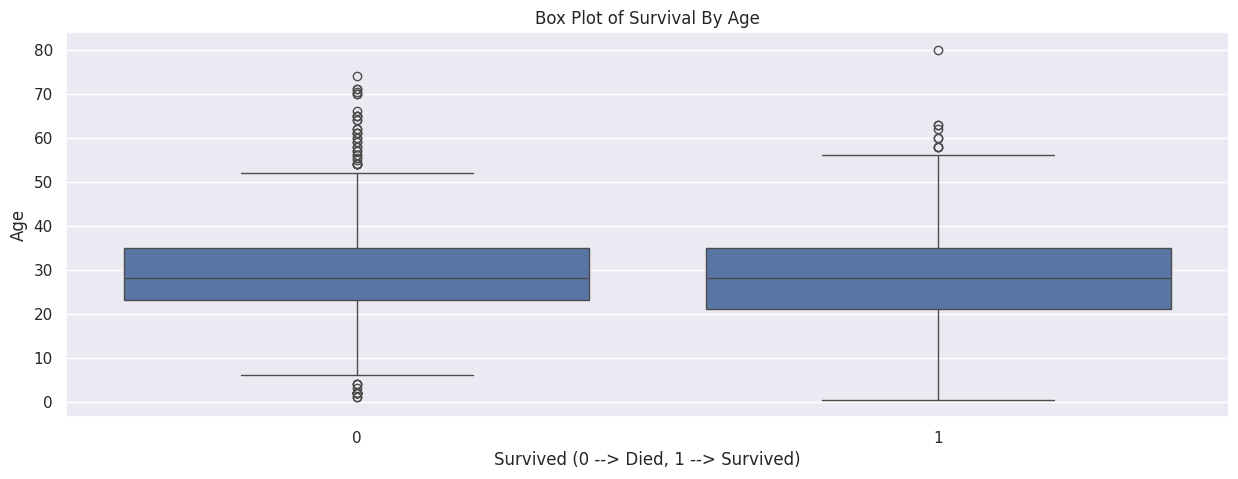

In [ ]:
# visualization
plt.figure(figsize=(15,5))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Box Plot of Survival By Age')
plt.xlabel('Survived (0 --> Died, 1 --> Survived)')
plt.ylabel('Age')
plt.show()

Survived By Fare Paid

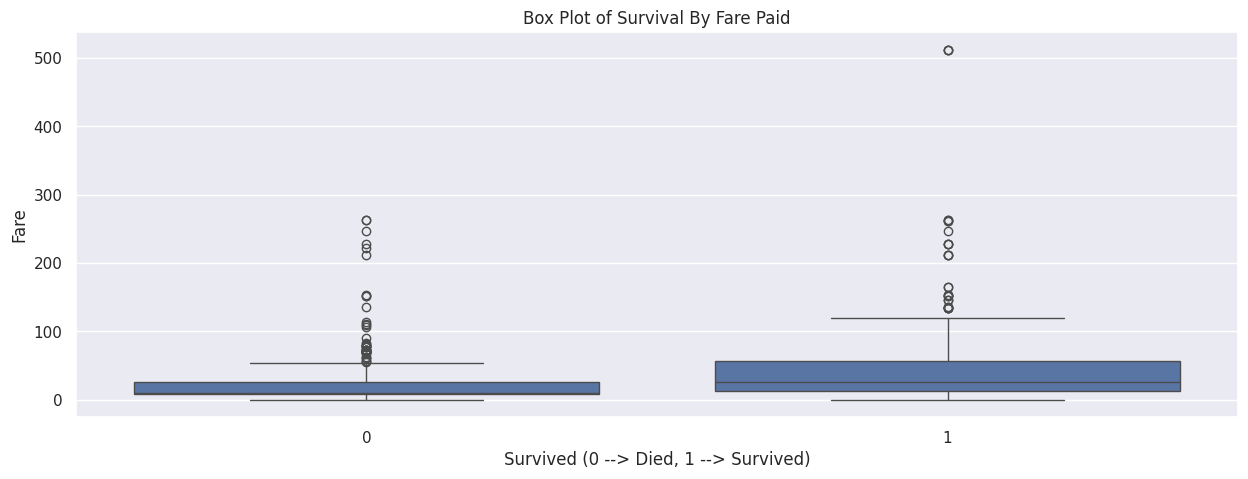

In [ ]:
# visualization
plt.figure(figsize=(15,5))
sns.boxplot(x='survived', y='fare', data=df)
plt.title('Box Plot of Survival By Fare Paid')
plt.xlabel('Survived (0 --> Died, 1 --> Survived)')
plt.ylabel('Fare')
plt.show()

Correlation HeatMap


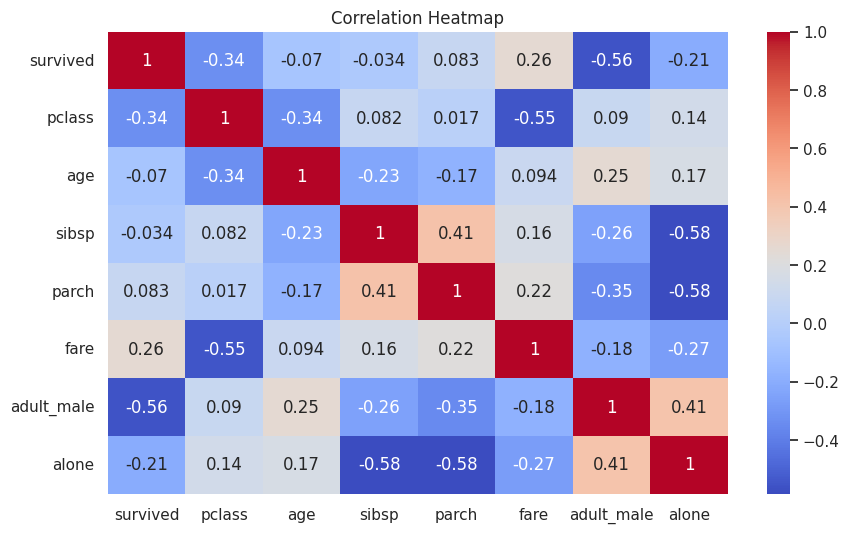

In [ ]:
# visualization
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Survival By Alone or Not

In [ ]:
# calculating the family size
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['alone'] = df['family_size'].apply(lambda x: 1 if x == 1 else 0)

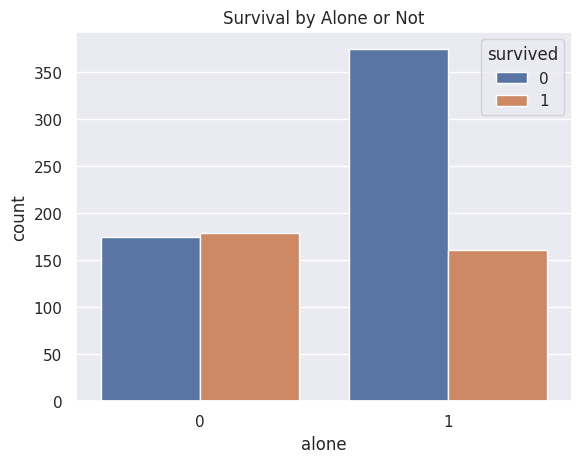

sex
female    0.740385
male      0.188908
Name: survived, dtype: float64
pclass
1    0.626168
2    0.472826
3    0.242363
Name: survived, dtype: float64


In [ ]:
#visualization
sns.countplot(x='alone', hue='survived', data=df)
plt.title('Survival by Alone or Not')
plt.show()

# Mean values of survived ones wrt their gender and passenger class
print(df.groupby('sex')['survived'].mean())
print(df.groupby('pclass')['survived'].mean())